# Beispielsaufgabe

### CSV-Datei -Aufgabe

Ein Unternehmen hat Ihnen eine CSV-Datei namens sales_data.csv zur Verfügung gestellt. Diese Datei enthält Verkaufsdaten aus verschiedenen Filialen, die aufbereitet werden müssen, bevor sie in einem DataFrame gespeichert und analysiert werden können.

Die CSV-Datei hat das folgende Format:
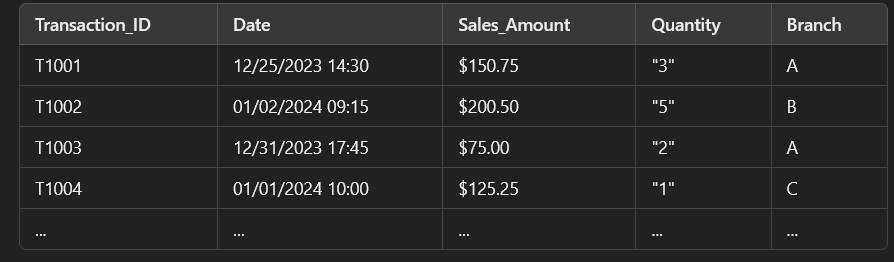

### Aufgabenstellung:

1. Lesen Sie die Datei sales_data.csv ein und konvertieren Sie die Daten in einen DataFrame.
2. Konvertieren Sie das Datumsformat in der Spalte Date in das Format YYYY-MM-DD HH:MM (z. B. 2023-12-25 14:30).
3. Entfernen Sie das Dollarzeichen aus der Spalte Sales_Amount und konvertieren Sie die Werte in numerische (float) Werte.
4. Konvertieren Sie die Spalte Quantity von einer Textdarstellung in numerische (int) Werte.
5. Geben Sie das bereinigte DataFrame aus und überprüfen Sie, ob die Konvertierungen erfolgreich waren, indem Sie den Datentyp jeder Spalte anzeigen.

In [64]:
import pandas as pd

# Datei mit dem richtigen Trennzeichen einlesen und Spaltennamen anzeigen
df = pd.read_csv("sales_data.csv", sep=";")
print("Spaltennamen:", df.columns)

# Prüfen, ob die Spalte 'Date' enthalten ist und keine Leerzeichen hat
df.columns = df.columns.str.strip()  # Entfernt potenzielle Leerzeichen aus Spaltennamen

# Datumsformat konvertieren
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')  # 'errors=coerce' konvertiert unpassende Formate zu NaT

# Dollarzeichen aus `Sales_Amount` entfernen und in Float konvertieren
df['Sales_Amount'] = df['Sales_Amount'].replace('[\$,]', '', regex=True).astype(float)

# `Quantity` von Text zu Integer konvertieren
df['Quantity'] = df['Quantity'].astype(int)

# Bereinigtes DataFrame anzeigen
print(df.dtypes)


Spaltennamen: Index(['Transaction_ID', 'Date', 'Sales_Amount', 'Quantity', 'Branch'], dtype='object')
Transaction_ID            object
Date              datetime64[ns]
Sales_Amount             float64
Quantity                   int64
Branch                    object
dtype: object


In [65]:
df.head(5)

,Transaction_ID,Date,Sales_Amount,Quantity,Branch
0,T1001,2023-12-25 14:30:00,150.75,3,A
1,T1002,2024-01-02 09:15:00,200.50,5,B
2,T1003,2023-12-31 17:45:00,75.00,2,A
3,T1004,2024-01-01 10:00:00,125.25,1,C
4,T1005,2024-01-15 13:45:00,300.00,7,B


### Beispielsaufgabe Excel

Sie erhalten eine Excel-Datei namens sales_data.xlsx, die Verkaufsdaten aus verschiedenen Filialen enthält. Ihre Aufgabe besteht darin, die Daten aus dieser Datei zu bereinigen und vorzubereiten, bevor sie in einem DataFrame gespeichert und analysiert werden können.

Die Excel-Datei hat folgende Struktur:
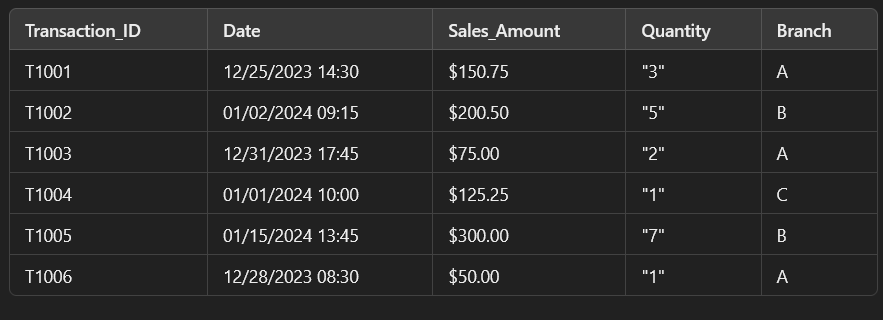

Aufgabenstellung:

1. Lesen Sie die Datei sales_data.xlsx ein und konvertieren Sie die Daten in einen DataFrame.
2. Konvertieren Sie das Datumsformat in der Spalte Date in das Format YYYY-MM-DD HH:MM (z. B. 2023-12-25 14:30).
4. Entfernen Sie das Dollarzeichen aus der Spalte Sales_Amount und konvertieren Sie die Werte in numerische (float) Werte.
5. Konvertieren Sie die Spalte Quantity von einer Textdarstellung in numerische (int) Werte.
6. Geben Sie das bereinigte DataFrame aus und überprüfen Sie, ob die Konvertierungen erfolgreich waren, indem Sie den Datentyp jeder Spalte anzeigen.

In [66]:
import pandas as pd

try:
    excel_file = pd.ExcelFile("sales_data.xlsx")
    print("Gefundene Arbeitsblätter:", excel_file.sheet_names)
except Exception as e:
    print("Fehler beim Laden der Excel-Datei:", e)


Gefundene Arbeitsblätter: ['Tabelle1']


In [67]:
import pandas as pd

# Datei einlesen
df = pd.read_excel("sales_data.xlsx")
print("Spaltennamen:", df.columns)

# Spaltennamen von Leerzeichen bereinigen
df.columns = df.columns.str.strip()

# 2. Datumsformat konvertieren
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')

# 3. Dollarzeichen aus `Sales_Amount` entfernen und in Float konvertieren
df['Sales_Amount'] = df['Sales_Amount'].replace('[\$,]', '', regex=True).astype(float)

# 4. Anführungszeichen aus `Quantity` entfernen und zu Integer konvertieren
df['Quantity'] = df['Quantity'].replace('"', '', regex=True).astype(int)

# Bereinigtes DataFrame anzeigen
print(df.head())

# Überprüfen Sie die Datentypen der Spalten
print(df.dtypes)


Spaltennamen: Index(['Transaction_ID', 'Date', 'Sales_Amount', 'Quantity', 'Branch'], dtype='object')
  Transaction_ID                    Date  Sales_Amount  Quantity Branch
0          T1001 2023-12-25 14:30:00.000        150.75         3      A
1          T1002 2024-02-01 09:15:00.000        200.50         5      B
2          T1003 2023-12-31 17:45:00.000         75.00         2      A
3          T1004 2024-01-01 10:00:00.000        125.25         1      C
4          T1005 2024-01-02 09:59:59.995        125.26         1      A
Transaction_ID            object
Date              datetime64[ns]
Sales_Amount             float64
Quantity                   int64
Branch                    object
dtype: object


In [68]:
df.head(5)

,Transaction_ID,Date,Sales_Amount,Quantity,Branch
0,T1001,2023-12-25 14:30:00.000,150.75,3,A
1,T1002,2024-02-01 09:15:00.000,200.50,5,B
2,T1003,2023-12-31 17:45:00.000,75.00,2,A
3,T1004,2024-01-01 10:00:00.000,125.25,1,C
4,T1005,2024-01-02 09:59:59.995,125.26,1,A


#### Aufgabe SQL Light
- Erstelle eine Verbindung zu einer SQLite-Datenbank und erstelle eine Tabelle namens STUDENTS mit folgenden Spalten:
    1. ID (Integer, Primärschlüssel)
    2. NAME (Text, nicht leer)
    3. AGE (Integer, nicht leer)
    4. CITY (Text)

- Füge die folgenden Daten in die Tabelle ein:
    - (1, "Max", 21, "Berlin")
    - (2, "Anna", 22, "München")
    - (3, "Tom", 20, "Hamburg")

- Schreibe eine SQL-Abfrage, um alle Studenten auszuwählen, die 21 Jahre oder älter sind, und lade das Ergebnis in ein Pandas DataFrame.

- Füge einen weiteren Datensatz (4, "Lisa", 23, "Frankfurt") in die Tabelle STUDENTS ein, indem du den DataFrame wieder in die Datenbank zurückschreibst.

### Lösung

Hier ist der Python-Code zur Lösung der Aufgaben:

In [ ]:
# Importiere die erforderlichen Bibliotheken
import sqlite3
import pandas as pd

# 1. Erstelle eine Verbindung zur SQLite-Datenbank (wenn die Datei nicht existiert, wird sie erstellt)
conn = sqlite3.connect('student_database.db')

# 2. Lösche alle vorhandenen Daten in der Tabelle STUDENTS, um Konflikte zu vermeiden
conn.execute("DELETE FROM STUDENTS;")
conn.commit()

# 3. Erstelle die Tabelle 'STUDENTS', wenn sie noch nicht existiert
conn.execute('''
    CREATE TABLE IF NOT EXISTS STUDENTS (
        ID INTEGER PRIMARY KEY NOT NULL,
        NAME TEXT NOT NULL,
        AGE INTEGER NOT NULL,
        CITY TEXT
    );
''')

# 4. Füge Daten in die Tabelle ein (manuell)
conn.execute("INSERT INTO STUDENTS (ID, NAME, AGE, CITY) VALUES (1, 'Max', 21, 'Berlin');")
conn.execute("INSERT INTO STUDENTS (ID, NAME, AGE, CITY) VALUES (2, 'Anna', 22, 'München');")
conn.execute("INSERT INTO STUDENTS (ID, NAME, AGE, CITY) VALUES (3, 'Tom', 20, 'Hamburg');")

# Änderungen speichern
conn.commit()

# 5. Wähle alle Studenten aus, die 21 Jahre oder älter sind, und lade das Ergebnis in ein DataFrame
query = "SELECT * FROM STUDENTS WHERE AGE >= 21"
df_students = pd.read_sql(query, conn)

# Zeige das Ergebnis
print("Studenten, die 21 Jahre oder älter sind:")
print(df_students)

# 6. Füge einen weiteren Datensatz (4, 'Lisa', 23, 'Frankfurt') zum DataFrame hinzu
new_student = pd.DataFrame({
    'ID': [4],
    'NAME': ['Lisa'],
    'AGE': [23],
    'CITY': ['Frankfurt']
})

# Füge den neuen Datensatz in die Datenbank ein
new_student.to_sql('STUDENTS', conn, if_exists='append', index=False)

# Überprüfe, ob der Datensatz hinzugefügt wurde
df_all_students = pd.read_sql("SELECT * FROM STUDENTS", conn)
print("\nAlle Studenten nach dem Hinzufügen von Lisa:")
print(df_all_students)

# Schließe die Verbindung zur Datenbank
conn.close()

OperationalError: database is locked

### Aufgabe CSV (Kommagetrennte Werte)
1. Aufgabe: Lies eine CSV-Datei daten.csv mit dem Trennzeichen ; und gib die ersten fünf Zeilen aus.
2. Aufgabe: Speichere einen DataFrame df in eine CSV-Datei output.csv mit dem Trennzeichen |

In [71]:
# Aufgabe 1
import pandas as pd
data = pd.read_csv('example_write.csv', sep=';')
print(data.head(5))

   Unnamed: 0  chicken_id       weight              breed  eggs_per_year
0           0           1  2728.854920  New Hampshire Red            158
1           1           2  2323.761365         Australorp            273
2           2           3  2635.062034  New Hampshire Red            153
3           3           4  2603.985152      Plymouth Rock            268
4           4           5  3079.394487         Australorp            360


In [72]:
# Aufgabe 2
df.to_csv('output.csv', sep='|', index=False)
df.head(10)

,Transaction_ID,Date,Sales_Amount,Quantity,Branch
0,T1001,2023-12-25 14:30:00.000,150.75,3,A
1,T1002,2024-02-01 09:15:00.000,200.50,5,B
2,T1003,2023-12-31 17:45:00.000,75.00,2,A
3,T1004,2024-01-01 10:00:00.000,125.25,1,C
4,T1005,2024-01-02 09:59:59.995,125.26,1,A
5,T1006,2024-01-03 09:59:59.995,125.27,1,B
6,T1007,2024-01-04 09:59:59.995,125.28,1,A
7,T1008,2024-01-05 09:59:59.995,125.29,1,C
8,T1009,2024-01-06 09:59:59.995,125.30,1,A
9,T1010,2024-01-07 09:59:59.995,125.31,1,B


### Aufgabe TXT (Textdateien)
1. Aufgabe: Öffne und lese eine Textdatei textdatei.txt, schreibe die ersten beiden Zeilen in eine neue Datei neue_datei.txt.
2. Aufgabe: Überprüfe, ob die Datei beispiel.txt im aktuellen Verzeichnis existiert.

In [73]:
# Aufgabe 1
with open('example_write.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

with open('neue_datei.txt', 'w', encoding='utf-8') as new_file:
    new_file.writelines(lines[:2])


In [74]:
# Aufgabe 2
import os
exists = os.path.isfile('beispiel.txt')
print("Datei existiert:", exists)


Datei existiert: False


### Aufgabe JSON (JavaScript Object Notation)
1. Aufgabe: Lies eine JSON-Datei daten.json und konvertiere sie in ein Pandas DataFrame.
2. Aufgabe: Schreibe einen DataFrame df in eine JSON-Datei output.json.


In [75]:
# Aufgabe 1
import pandas as pd
import json
with open('example.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)
print(df)

              firstName lastName  age        address
streetAddress      John    Smith   27  21 2nd Street
city               John    Smith   27       New York
state              John    Smith   27             NY
postalCode         John    Smith   27     10021-3100


In [76]:
# Aufgabe 2
df.to_json('output.json', orient='records')
df.head(10)

,firstName,lastName,age,address
streetAddress,John,Smith,27,21 2nd Street
city,John,Smith,27,New York
state,John,Smith,27,NY
postalCode,John,Smith,27,10021-3100


### Aufgabe XML (Extensible Markup Language)
1. Aufgabe: Lies eine XML-Datei daten.xml mit BeautifulSoup ein und gib die Inhalte aller <name>-Elemente aus.
2. Aufgabe: Konvertiere die XML-Datei daten.xml in ein Pandas DataFrame und speichere sie als output.xml.

In [77]:
# Aufgabe 1
from bs4 import BeautifulSoup
with open('example.xml', 'r') as file:
    soup = BeautifulSoup(file, 'xml')
names = soup.find_all('name')
for name in names:
    print(name.text)


Belgian Waffles


In [78]:
import pandas as pd

# Lese die XML-Datei in ein DataFrame
data = pd.read_xml('/workspaces/data_ingestion/01_Input_Output_and_Formatting_Python/example.xml', xpath=".//food")
print(data)



              name  price                                        description  \
0  Belgian Waffles  $5.95  \n   Two of our famous Belgian Waffles with pl...   

   calories  
0       650  


In [79]:
import os
# verzeichnis
print(os.getcwd())

/workspaces/data_ingestion/01_Input_Output_and_Formatting_Python


In [80]:
# AUfgabe 2
import pandas as pd
data = pd.read_xml('example.xml')
data.to_xml('output.xml', index=False)

### Aufgabe HTML (Hypertext Markup Language)
1. Aufgabe: Lies die Daten aus einer HTML-Datei beispiel.html und gib den Inhalt aus.
2. Aufgabe: Speichere die Daten aus content in eine neue HTML-Datei neue_seite.html und prüfe, ob die Datei existiert.

In [81]:
# Aufgabe 1
with open('example.html', 'r') as file:
    content = file.read()
print(content)


<!DOCTYPE html>
<html>
<head>
<title>Page Title</title>
</head>
<body><h1>My First Heading</h1>
<p>My first paragraph.</p></body>
</html>


In [82]:
with open('neue_seite.html', 'w') as file:
    file.write(content)

exists = os.path.isfile('neue_seite.html')
print("Datei existiert:", exists)

Datei existiert: True


### Aufgabe ZIP (archivdateien)
1. Aufgabe: Erstelle ein neues ZIP-Archiv archiv.zip und füge die Dateien datei1.txt und datei2.txt hinzu.
2. Aufgabe: Lies eine CSV-Datei daten.csv direkt aus einem ZIP-Archiv archiv.zip, ohne sie zu extrahieren.

In [85]:
# Aufgabe 1
from zipfile import ZipFile
with ZipFile('archiv3.zip', 'w') as zipObj:
    zipObj.write('neue_datei.txt')
    zipObj.write('example.txt')

Aufgabe 2
import pandas as pd
data = pd.read_csv('zip:///workspaces/data_ingestion/01_Input_Output_and_Formatting_Python/archive.zip!example.csv')
print(data.head())

In [ ]:
from zipfile import ZipFile
import pandas as pd

# Entpacke die Datei aus dem ZIP-Archiv
with ZipFile('/workspaces/data_ingestion/01_Input_Output_and_Formatting_Python/archive.zip', 'r') as zipObj:
    zipObj.extract('example.csv', '/workspaces/data_ingestion/01_Input_Output_and_Formatting_Python')

# Lese die entpackte Datei und speichere sie in einem dataframe
data = pd.read_csv('/workspaces/data_ingestion/01_Input_Output_and_Formatting_Python/example.csv')

# Gib den Data frame aus
data.head(4)

,chicken_id;weight;breed;eggs_per_year
0,1;2728.85492;New Hampshire Red;158
1,2;2323.761365;Australorp;273
2,3;2635.062034;New Hampshire Red;153
3,4;2603.985152;Plymouth Rock;268


In [ ]:
# Zeige die Struktur des DataFrames an
print(data.info())

# Zeige die ersten 10 Zeilen
print(data.head(10))

# Zeige die Spaltennamen
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   chicken_id;weight;breed;eggs_per_year  25 non-null     object
dtypes: object(1)
memory usage: 332.0+ bytes
None
  chicken_id;weight;breed;eggs_per_year
0    1;2728.85492;New Hampshire Red;158
1          2;2323.761365;Australorp;273
2   3;2635.062034;New Hampshire Red;153
3       4;2603.985152;Plymouth Rock;268
4          5;3079.394487;Australorp;360
5         6;2250.163583;Barnevelder;317
6       7;2648.364847;Plymouth Rock;158
7   8;2371.107826;New Hampshire Red;275
8         9;2224.379423;Barnevelder;169
9      10;2577.250189;Plymouth Rock;340
Index(['chicken_id;weight;breed;eggs_per_year'], dtype='object')


In [ ]:
import pandas as pd

# Lade die Datei und stelle sicher, dass keine Kopfzeile als Header erkannt wird
data = pd.read_csv('/workspaces/data_ingestion/01_Input_Output_and_Formatting_Python/example.csv', header=None, names=['combined'])

# Teile die Spalte 'combined' in einzelne Spalten auf, basierend auf dem ';'-Trennzeichen
data[['chicken_id', 'weight', 'breed', 'eggs_per_year']] = data['combined'].str.split(';', expand=True)

# Entferne die ursprüngliche Spalte 'combined', die nicht mehr benötigt wird
data = data.drop(columns=['combined'])

# Überspringe die erste Zeile, falls sie die Kopfzeile enthält, und konvertiere die Datentypen
data = data[1:].reset_index(drop=True)  # Entferne die Zeile mit den Kopfzeilen

# Konvertiere die Spalten in die passenden Datentypen
data['chicken_id'] = data['chicken_id'].astype(int)
data['weight'] = data['weight'].astype(float)
data['eggs_per_year'] = data['eggs_per_year'].astype(int)

# Zeige den formatierten DataFrame an
print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   chicken_id     25 non-null     int64  
 1   weight         25 non-null     float64
 2   breed          25 non-null     object 
 3   eggs_per_year  25 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 932.0+ bytes
None


,chicken_id,weight,breed,eggs_per_year
0,1,2728.854920,New Hampshire Red,158
1,2,2323.761365,Australorp,273
2,3,2635.062034,New Hampshire Red,153
3,4,2603.985152,Plymouth Rock,268
4,5,3079.394487,Australorp,360


### Aufgabe XLSX (Microsoft Excel)
1. Aufgabe: Lies die Daten aus dem Sheet Sheet1 einer Excel-Datei daten.xlsx und gib sie aus.
2. Aufgabe: Speichere die Daten aus einem DataFrame df in eine Excel-Datei output.xlsx und überprüfe, ob die Datei existiert.

In [ ]:
# Aufgabe 1
import pandas as pd
# data = pd.read_excel('example_write.xlsx', sheet_name='Sheet1')
data = pd.read_excel('example_write.xlsx')
print(data)

    Unnamed: 0  chicken_id       weight              breed  eggs_per_year
0            0           1  2728.854920  New Hampshire Red            158
1            1           2  2323.761365         Australorp            273
2            2           3  2635.062034  New Hampshire Red            153
3            3           4  2603.985152      Plymouth Rock            268
4            4           5  3079.394487         Australorp            360
5            5           6  2250.163583        Barnevelder            317
6            6           7  2648.364847      Plymouth Rock            158
7            7           8  2371.107826  New Hampshire Red            275
8            8           9  2224.379423        Barnevelder            169
9            9          10  2577.250189      Plymouth Rock            340
10          10          11  2378.704263        Barnevelder            161
11          11          12  2398.090868         Australorp            185
12          12          13  2516.44488

In [ ]:
# Aufgabe 2 
df.to_excel('output.xlsx', index=False)
exists = os.path.isfile('output.xlsx')
print("Datei existiert:", exists)

Datei existiert: True


### Aufgabe PDF (Portable Document Format)
1. Aufgabe: Extrahiere den Text und die Metadaten aus der PDF-Datei dokument.pdf.
2. Aufgabe: Erstelle ein neues PDF output.pdf mit dem Text „Hallo, dies ist eine PDF-Datei“ in blauer Schrift.

In [ ]:
# Aufgabe 1
from PyPDF2 import PdfReader
reader = PdfReader("example.pdf")
meta = reader.metadata
text = reader.pages[0].extract_text()

print("Metadaten:", meta)
print("Text der ersten Seite:", text)


Metadaten: {'/Author': 'Gellrich Mario (gell)', '/Company': '', '/CreationDate': "D:20220306135939+01'00'", '/Creator': 'Acrobat PDFMaker 21 für Excel', '/MSIP_Label_10d9bad3-6dac-4e9a-89a3-89f3b8d247b2_ActionId': '6c412dd4-ac43-489a-8e51-585029c84fdd', '/MSIP_Label_10d9bad3-6dac-4e9a-89a3-89f3b8d247b2_ContentBits': '0', '/MSIP_Label_10d9bad3-6dac-4e9a-89a3-89f3b8d247b2_Enabled': 'true', '/MSIP_Label_10d9bad3-6dac-4e9a-89a3-89f3b8d247b2_Method': 'Standard', '/MSIP_Label_10d9bad3-6dac-4e9a-89a3-89f3b8d247b2_Name': '10d9bad3-6dac-4e9a-89a3-89f3b8d247b2', '/MSIP_Label_10d9bad3-6dac-4e9a-89a3-89f3b8d247b2_SetDate': '2022-03-06T12:52:42Z', '/MSIP_Label_10d9bad3-6dac-4e9a-89a3-89f3b8d247b2_SiteId': '5d1a9f9d-201f-4a10-b983-451cf65cbc1e', '/ModDate': "D:20220306135940+01'00'", '/Producer': 'Adobe PDF Library 21.11.71'}
Text der ersten Seite: This is a PDF-File
Table 1:
Pet Color
Dog brown
Cat yellow
Bird green
Dog black
Cat gray
Bird green
Dog red
Cat blue


In [ ]:
# Aufgabe 2
from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen.canvas import Canvas
from reportlab.lib.colors import blue

canvas = Canvas("output.pdf", pagesize=LETTER)
canvas.setFont("Helvetica", 12)
canvas.setFillColor(blue)
canvas.drawString(100, 750, "Hallo, dies ist eine PDF-Datei")
canvas.save()

### Bilddateien
1. Aufgabe: Lade und zeige ein JPEG-Bild bild.jpeg mit Matplotlib an.

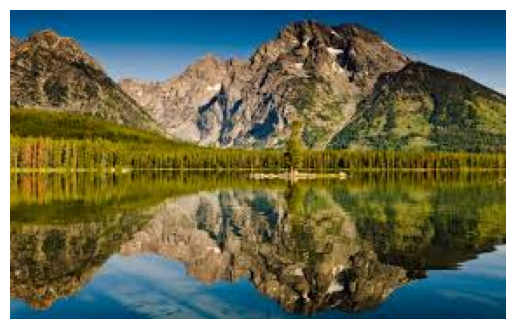

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('example.jpeg')
plt.imshow(image)
plt.axis('off')  # Achsen ausblenden
plt.show()


# Prüfungsaufgabe: Data Ingestion und SQLite

Hinweis: Diese Aufgabe überprüft Ihre Kenntnisse im Einlesen und Verarbeiten von Daten aus verschiedenen Dateiformaten sowie im Umgang mit einer SQLite-Datenbank.
Aufgabe

Sie haben verschiedene Datenquellen in den folgenden Formaten erhalten:

- CSV (sales_data.csv)
- JSON (customer_data.json)
- Excel (inventory_data.xlsx)

Außerdem soll eine SQLite-Datenbank verwendet werden, um die Daten zusammenzuführen und einfache Abfragen durchzuführen.

### Datenbeschreibung:

- sales_data.csv enthält Verkaufsdaten mit folgenden Spalten: Transaction_ID, Date, Sales_Amount, Quantity, Branch.
- customer_data.json enthält Kundeninformationen mit folgenden Feldern: Customer_ID, Name, City, Phone.
- inventory_data.xlsx enthält Lagerbestände mit folgenden Spalten: Product_ID, Product_Name, Stock_Quantity, Price.

### Aufgabenstellung:

1. Lesen Sie die Daten aus allen drei Dateien ein und bereinigen Sie die Daten:
    - Konvertieren Sie das Datumsformat in sales_data.csv in das Format YYYY-MM-DD.
    - Entfernen Sie das Dollarzeichen ($) aus Sales_Amount in sales_data.csv und konvertieren Sie die Werte in float.
    - Stellen Sie sicher, dass alle Werte in Quantity und Stock_Quantity als Integer vorliegen.

2. Speichern Sie die Daten in einer SQLite-Datenbank company_data.db mit folgenden Tabellen:
    - Sales für Verkaufsdaten
    - Customers für Kundendaten
    - Inventory für Lagerbestände

3. Erstellen Sie Abfragen in SQL, um Folgendes zu ermitteln:
    - Die durchschnittliche Sales_Amount für jede Filiale (Branch) in der Tabelle Sales.
    - Eine Liste aller Kunden (Name) aus der Tabelle Customers, die in der gleichen Stadt (City) leben wie die Filiale in der Tabelle Sales.
    - Die Gesamtmenge (Stock_Quantity) aller Produkte in der Tabelle Inventory.

4. Geben Sie die Ergebnisse der Abfragen in Pandas-DataFrames aus und zeigen Sie sie an.

In [ ]:
# Überprüfe die Spaltennamen
sales_df = pd.read_csv("sales_data.csv")
print("Spaltennamen in sales_data.csv:", sales_df.columns)


Spaltennamen in sales_data.csv: Index(['Transaction_ID;Date;Sales_Amount;Quantity;Branch'], dtype='object')


In [ ]:
import pandas as pd
import sqlite3
import json

# 1. Daten einlesen und bereinigen

# Lesen der CSV-Datei mit dem richtigen Delimiter
sales_df = pd.read_csv("sales_data.csv", delimiter=';')

# Konvertiere das Datumsformat (inkl. Uhrzeit) in das Format YYYY-MM-DD
sales_df['Date'] = pd.to_datetime(sales_df['Date'], format='%m/%d/%Y %H:%M').dt.strftime('%Y-%m-%d')

# Entferne das Dollarzeichen ($) aus Sales_Amount und konvertiere die Werte in float
sales_df['Sales_Amount'] = sales_df['Sales_Amount'].replace('[\$,]', '', regex=True).astype(float)

# Stelle sicher, dass alle Werte in Quantity als Integer vorliegen
sales_df['Quantity'] = sales_df['Quantity'].astype(int)

# Lesen der JSON-Datei
with open("customer_data.json", "r") as f:
    customer_data = json.load(f)
customers_df = pd.json_normalize(customer_data)

# Lesen der Excel-Datei
inventory_df = pd.read_excel("inventory_data.xlsx")

# Stelle sicher, dass alle Werte in Stock_Quantity als Integer vorliegen
inventory_df['Stock_Quantity'] = inventory_df['Stock_Quantity'].astype(int)

# 2. Speichern in SQLite-Datenbank
conn = sqlite3.connect("company_data.db")

# Tabellen erstellen und Daten einfügen
sales_df.to_sql('Sales', conn, if_exists='replace', index=False)
customers_df.to_sql('Customers', conn, if_exists='replace', index=False)
inventory_df.to_sql('Inventory', conn, if_exists='replace', index=False)

# 3. SQL-Abfragen ausführen

# Durchschnittliche Verkaufsmenge pro Filiale
avg_sales_query = "SELECT Branch, AVG(Sales_Amount) AS Avg_Sales FROM Sales GROUP BY Branch"
avg_sales_df = pd.read_sql(avg_sales_query, conn)
print("Durchschnittlicher Verkaufsbetrag pro Filiale:")
print(avg_sales_df)

# Kundenliste aus der gleichen Stadt wie die Filiale
customers_query = """
SELECT c.Name
FROM Customers c
JOIN Sales s ON c.City = s.Branch
"""
customers_city_df = pd.read_sql(customers_query, conn)
print("Kunden aus der gleichen Stadt wie die Filiale:")
print(customers_city_df)

# Gesamtmenge aller Produkte
stock_query = "SELECT SUM(Stock_Quantity) AS Total_Stock FROM Inventory"
total_stock_df = pd.read_sql(stock_query, conn)
print("Gesamtmenge aller Produkte im Lager:")
print(total_stock_df)

# Verbindung zur Datenbank schließen
conn.close()

Durchschnittlicher Verkaufsbetrag pro Filiale:
  Branch   Avg_Sales
0      A   91.916667
1      B  250.250000
2      C  125.250000
Kunden aus der gleichen Stadt wie die Filiale:
Empty DataFrame
Columns: [Name]
Index: []
Gesamtmenge aller Produkte im Lager:
   Total_Stock
0          775


In [ ]:
total_stock_df.head(5)

,Total_Stock
0,775


## The END